# Ballistic Deposition: Simultaneous Drop

<p>This represents a simulation where the deposited particles are dropped at the same time.</p>

In [59]:
%%time

import numpy
import random
import os
from PIL import Image
from matplotlib import pyplot as plt


def tree_simulation(size, points, iterations, progress):
    n=size
    data = numpy.zeros((n,n,3),dtype=numpy.uint8)
    danger_zone=numpy.zeros((n+1,n+1,1),dtype=numpy.uint8)

    live_points_count = points
    original_count = live_points_count
    particles = []

    #Create random set of live points, and make them visible
    i=0
    x=numpy.random.randint(0,n-1,size=live_points_count)
    y=numpy.random.randint(0,n-1,size=live_points_count)

    while i < live_points_count:
        data[x[i]][y[i]] = [255,255,255]
        coord = (x[i],y[i])
        #TODO create a far list and a near list.
        #The near list should only be particles that are within a certain x by x square and are updated every single step
        #The far list are updated every 20 steps.
        particles.append(coord)
        i+=1

    center = n//2

    

    for x in range(n):
        #set bottom line row to red and set them as a killer space
        data[n-1][x]=[0,255,0]
        danger_zone[n-1][x]=1

        #Look at points above the line to set to killer.
        danger_zone[n-2][x]=1
        data[n-2][x]=[0,0,255]

   

    image = Image.fromarray(data)
    image.show()

    for frame in range(iterations):
        live_points_count = len(particles)
        if(live_points_count == 0): break
        #rand_motion = numpy.random.randint(0,4,live_points_count)

        movement = particles

        
        
        if frame % 100 == 0:
            print('iteration: ' + str(frame) + ' Particle Count: ' + str(live_points_count))
            if(progress):
                image = Image.fromarray(data)
                image.show()
            


        for idx, pixel in enumerate(movement):
            #set current spot to black, pixel[0] is the particle and pixel[1] is the random motion for particle
            x=pixel[0]
            y=pixel[1]

            if (data[x][y][0] != 255):
                data[x][y] = [0,0,0]

            
            #Particle moves downwards!
            x+=1
            if(x<=-1):
                x=n-1
            

            
            #make the danger-zone check
            if(danger_zone[x][y]==1):
                #print('Danger Zoned!', x, y)

                data[x-1][y] = [0,0,0]
                danger_zone[x-1][y]=1
                danger_zone[x+1][y]=1
                #if(x+1 < 200 and x-1 > 0):
                    #data[x-1][y]=[0,255,0]
                    #data[x+1][y]=[0,255,0]

                #Up and Down
                danger_zone[x][y-1]=1
                danger_zone[x][y+1]=1

                #if(y+1 < 200 and y-1 > 0):
                    #data[x][y-1]=[0,255,0]
                    #data[x][y+1]=[0,255,0]

                data[x][y] = [255,0,0]

                #print("pixel value: ", data[x][y][0])
                particles.pop(idx)

            else:
                data[x-1][y] = [0,0,0]
                data[x][y]=[255,255,255]
                particles[idx] = (x,y)
            



            
    #image = Image.fromarray(data)
    #image.show()

    return data;



CPU times: total: 0 ns
Wall time: 0 ns


<p> Modify these parameters to see how the fractal grows. The simulation will generate the initial conditions and show it. Then it will run and print the final image below. </p>

iteration: 0 Particle Count: 50000
iteration: 100 Particle Count: 121


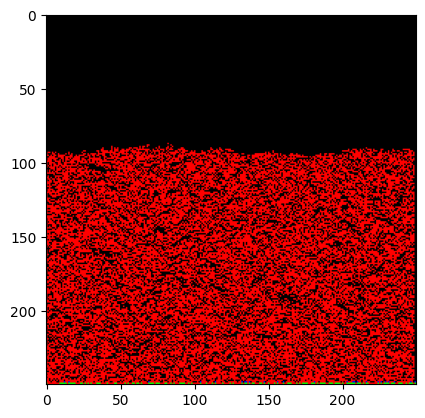

In [67]:
#Modify these
Grid_size = 250         #Creates a square grid of size Grid_size
particle_count = 50000   #Number of particles
iterations = 1000       #Amount of times that the simulation will run for.
Show_Progress = False    #If true, the simulation will show how the fractal grows. 

plt.imshow(tree_simulation(Grid_size,particle_count,iterations, Show_Progress))